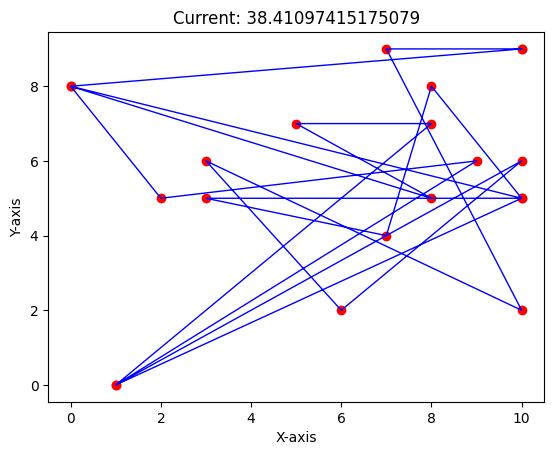

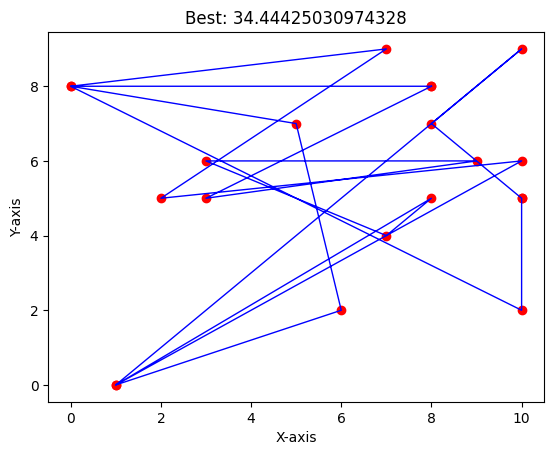

In [1]:
from __future__ import annotations
import matplotlib.pyplot as plt
import random
import copy
import math

# Jupyter
from IPython.display import display, clear_output

def draw_maps(best_solution: Solution, current_solution: Solution, points: list[tuple]):
    clear_output(wait=True)
    draw_map(f'Current: {current_solution.dist}', points, current_solution.point_indices)
    draw_map(f'Best: {best_solution.dist}', points, best_solution.point_indices)

def draw_map(title: str, points: list[tuple], point_indices: list[int]) -> None:
    ordered_points = [points[i] for i in point_indices]
    x, y = zip(*ordered_points)
    x = x + (x[0],)
    y = y + (y[0],)

    plt.scatter(x, y, color='red', marker='o')
    plt.plot(x, y, color='blue', linestyle='-', linewidth=1)

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)

    plt.show()
        
class Solution:
    def __init__(self, point_indices: list[int]) -> None:
        self.point_indices = point_indices
        self.dist = None

    def calculate_distance(self, points: list[tuple]) -> int:
        journey = 0
        ordered_points = [points[i] for i in self.point_indices]
        ordered_points.append(ordered_points[0])
        for i, point in enumerate(points):
            x1, y1 = point
            x2, y2 = ordered_points[(i+1) % len(ordered_points)]
            dist = math.sqrt(((x2-x1)**2 + (y2-y1)**2))
            journey = journey + dist
        self.dist = journey
        return journey
    
    def clone(self) -> Solution:
        return copy.deepcopy(self)
    
    def swap_points(self, point_index1: int, point_index2: int) -> None:
        self.point_indices[point_index2] = self.point_indices[point_index1]
        self.point_indices[point_index1] = self.point_indices[point_index2]

    def reverse_segment(self, starting_index: int, ending_index: int) -> None:
        starting_segment = self.point_indices[starting_index:ending_index+1]
        flipped_segment = starting_segment[::-1]
        self.point_indices[starting_index:ending_index+1] = flipped_segment

    
class Solver:
    def __init__(self, point_count: int = 20, map_size: int = 10) -> None:
        self.point_count = point_count
        self.temp = 100
        self.temp_mult_factor = 0.98

        points, point_indices = [], []
        for i in range(point_count):
            points.append([random.randint(0, map_size), random.randint(0, map_size)])
            point_indices.append(i)

        self.points = points
        self.current_solution = Solution(point_indices)
        self.current_solution.calculate_distance(points)
        self.best_solution = self.current_solution

    def solve(self):
        total_iterations = 0
        max_iterations = 10000
        min_temp = 0.5
        while self.temp > min_temp and total_iterations < max_iterations:
            draw_maps(self.best_solution, self.current_solution, self.points)
            self.solve_step()
            self.temp = self.temp * self.temp_mult_factor
            total_iterations = total_iterations + 1

    def solve_step(self):
        moves_to_attempt = 1 * self.point_count
        max_changes = 1 * self.point_count
        change_count = 0
        
        for i in range(moves_to_attempt):
            point_index1 = random.randint(0, self.point_count)
            point_index2 = random.randint(0, self.point_count)
            if point_index1 == point_index2:
                if point_index2 + 1 < self.point_count:
                    point_index2 = point_index2 + 1
                else:
                    point_index1 = point_index1 - 1
            if point_index1 > point_index2:
                point_index1, point_index2 = point_index2, point_index1

            clone = self.current_solution.clone()
            clone.reverse_segment(point_index1, point_index2)
            new_dist = clone.calculate_distance(self.points)
            dist = self.current_solution.dist
            cost = new_dist - dist
            if not self.should_replace(cost):
                continue
            self.current_solution = clone
            if clone.dist < self.best_solution.dist:
                self.best_solution = clone
            change_count = change_count + 1
            if change_count > max_changes:
                break
        #print(f'Temp: {self.temp:.5f} - Current Distance: {self.current_solution.dist:.5f} - Best Distance: {self.best_solution.dist:.5f} - Changes: {change_count}')

    def should_replace(self, cost) -> bool:
        if cost < 0:
            return True
        risk_power = math.e ** (-cost/self.temp)
        anaylsis = (risk_power > random.random())
        return anaylsis
            
def main():
    solver = Solver()
    solver.solve()
    #draw_map('Start', solver.points, list(range(solver.point_count)))


def test():
    solver = Solver(5)
    solver.points = list(zip(range(5), [0]*5))
    solver.current_solution.reverse_segment(2, 3)
    print(solver.current_solution.point_indices)
    output = solver.current_solution.calculate_distance(solver.points)
    print(output)

#test()
main()